<a href="https://colab.research.google.com/github/Aasha03/fmllab/blob/main/Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

In [25]:
data= pd.read_csv("housing.csv")
data.isnull()

,RM,LSTAT,PTRATIO,MEDV
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
484,False,False,False,False
485,False,False,False,False
486,False,False,False,False
487,False,False,False,False


In [34]:
data.head(n=10)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [50]:
X=data.drop('MEDV',axis=1).values
y=data['MEDV'].values

In [51]:
X_rooms=X[:,2]
print(X_rooms)

[15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 15.2 15.2 15.2 21.
 21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.  21.
 21.  21.  21.  21.  21.  21.  21.  19.2 19.2 19.2 19.2 18.3 18.3 17.9
 17.9 17.9 17.9 17.9 17.9 17.9 17.9 17.9 16.8 16.8 16.8 16.8 21.1 17.9
 17.3 15.1 19.7 19.7 19.7 19.7 19.7 19.7 18.6 16.1 16.1 18.9 18.9 18.9
 19.2 19.2 19.2 19.2 18.7 18.7 18.7 18.7 18.7 18.7 19.  19.  19.  19.
 18.5 18.5 18.5 18.5 17.8 17.8 17.8 17.8 18.2 18.2 18.2 18.  18.  18.
 18.  18.  20.9 20.9 20.9 20.9 20.9 20.9 20.9 20.9 20.9 20.9 20.9 17.8
 17.8 17.8 17.8 17.8 17.8 17.8 17.8 17.8 19.1 19.1 19.1 19.1 19.1 19.1
 19.1 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2 21.2
 21.2 21.2 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7
 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7 14.7
 16.6 16.6 16.6 16.6 16.6 16.6 16.6 17.8 17.8 17.8 17.8 17.8 17.8 17.8
 15.2 15.2 15.2 15.2 15.2 15.2 15.6 15.6 12.6 12.6 12.6 17.  17.  14.7
 14.7 14.7

In [52]:
X_rooms.shape,y.shape

((489,), (489,))

In [53]:
X_rooms= X_rooms.reshape(-1,1)
y=y.reshape(-1,1)
print(X_rooms)
print(y)

[[15.3]
 [17.8]
 [17.8]
 [18.7]
 [18.7]
 [18.7]
 [15.2]
 [15.2]
 [15.2]
 [15.2]
 [15.2]
 [15.2]
 [15.2]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [21. ]
 [19.2]
 [19.2]
 [19.2]
 [19.2]
 [18.3]
 [18.3]
 [17.9]
 [17.9]
 [17.9]
 [17.9]
 [17.9]
 [17.9]
 [17.9]
 [17.9]
 [17.9]
 [16.8]
 [16.8]
 [16.8]
 [16.8]
 [21.1]
 [17.9]
 [17.3]
 [15.1]
 [19.7]
 [19.7]
 [19.7]
 [19.7]
 [19.7]
 [19.7]
 [18.6]
 [16.1]
 [16.1]
 [18.9]
 [18.9]
 [18.9]
 [19.2]
 [19.2]
 [19.2]
 [19.2]
 [18.7]
 [18.7]
 [18.7]
 [18.7]
 [18.7]
 [18.7]
 [19. ]
 [19. ]
 [19. ]
 [19. ]
 [18.5]
 [18.5]
 [18.5]
 [18.5]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [18.2]
 [18.2]
 [18.2]
 [18. ]
 [18. ]
 [18. ]
 [18. ]
 [18. ]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [20.9]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [17.8]
 [19.1]
 [19.1]
 [19.1]
 [19.1]
 [19.1]


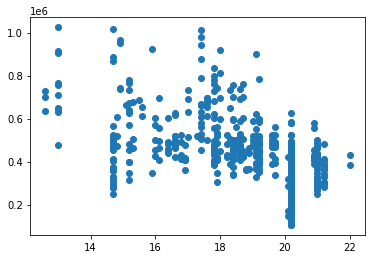

In [54]:
plt.scatter(X_rooms,y)
plt.show()

In [56]:
reg=linear_model.LinearRegression()
reg.fit(X_rooms,y)

LinearRegression()

LinearRegression()

In [58]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred=reg.predict(X_rooms)
print(f'MAE = {mean_absolute_eplt.scatter(X_rooms, y, color='blue')
plt.plot(X_rooms, reg.predict(X_rooms), color='red', linewidth=3)
plt.show()rror(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')
     


MAE = 107317.48334793832
MSE = 19931981057.696846
RMSE = 141180.66814439165
R_2 = 0.26939577778848267


In [59]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
     


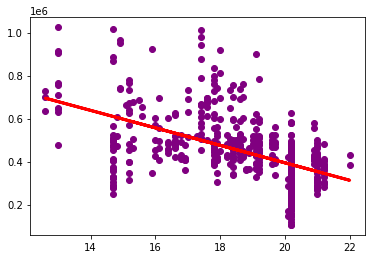

In [61]:
plt.scatter(X_rooms, y, color='purple')
plt.plot(X_rooms, reg.predict(X_rooms), color='red', linewidth=3)
plt.show()

In [73]:
from sklearn.model_selection import train_test_split
X_train,Y_train,X_test,Y_test=train_test_split(X_rooms,y,train_size=0.7,test_size=0.3)

In [74]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(342, 1)
(147, 1)
(342, 1)
(147, 1)


In [72]:
reg=linear_model.LinearRegression()
reg.fit(X_rooms,y)

LinearRegression()

In [79]:
reg=linear_model.LinearRegression()
reg.fit(X_train, Y_train)

ValueError: ignored